In [1]:
#import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import pandas_profiling

%matplotlib inline
plt.rcParams['figure.figsize']=10,7.5
plt.rcParams['axes.grid']=True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,accuracy_score,roc_auc_score

<Figure size 720x540 with 0 Axes>

In [2]:
#reading csv file in dataframe
existing_customer=pd.read_csv(r'C:\Users\ASUS-PC\Downloads\train_PDjVQMB.csv')
existing_customer.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


# data preprocessing

In [3]:
# Counting Target Variable Values

existing_customer.Is_Churn.value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [4]:
# Checking for null Values or missing values

existing_customer.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [5]:
# Display Columns with Null Values
existing_customer[existing_customer.isnull().any(axis=1)]

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn


In [6]:
# Display Summary of the DataSet

existing_customer.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


In [7]:
# Checking the Column Types

existing_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [8]:
existing_customer.shape

(6650, 11)

# data visualization

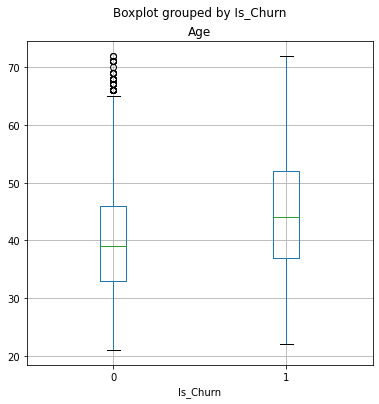

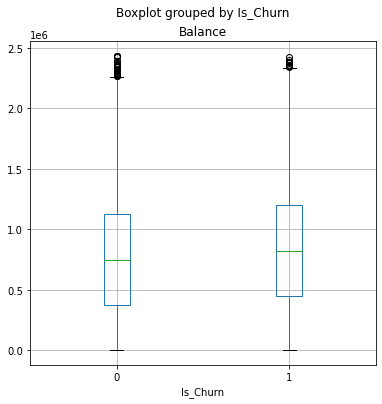

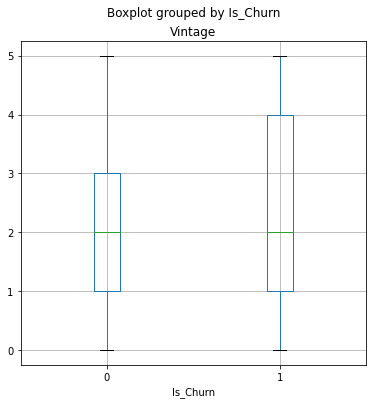

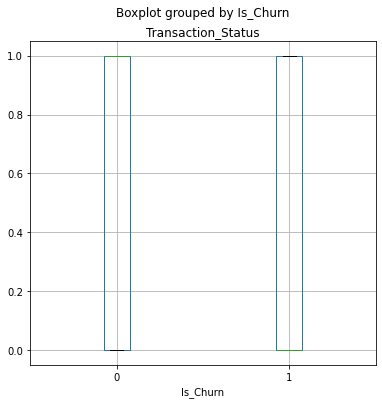

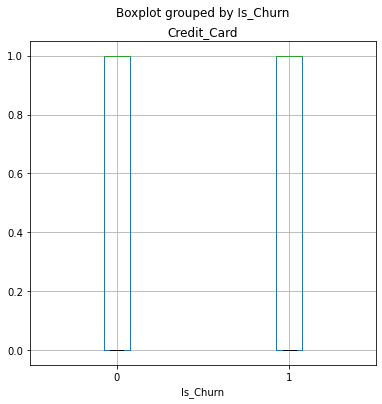

In [9]:
# Here Using Visualising the Data Using BoxPlot

from matplotlib import pyplot as plt
%matplotlib inline

num_feat = ['Age','Balance','Vintage','Transaction_Status','Credit_Card']
for col in num_feat:
    existing_customer.boxplot(column=col, by='Is_Churn',figsize = (6,6))
    plt.title(col)
plt.show()

# With respect to Is_Churn Column age and balance contains Outlier

<AxesSubplot:>

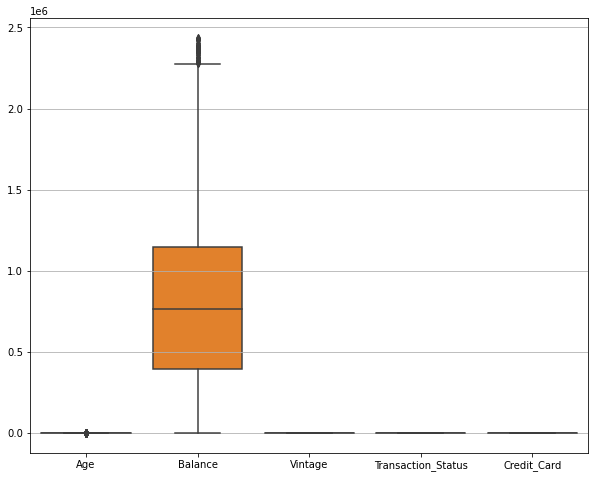

In [10]:
fig ,ax  = plt.subplots(figsize = (10,8))
sns.boxplot(data = existing_customer[['Age','Balance','Vintage','Transaction_Status','Credit_Card']] , ax = ax)

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

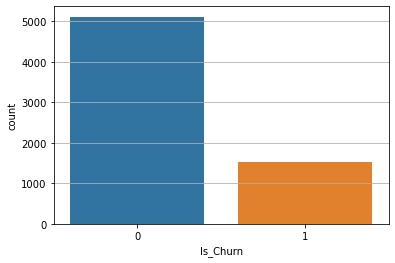

In [11]:
# Count Plot for Categorical Variable
sns.countplot(x='Is_Churn',data=existing_customer)

# Customer Churn's with Percentage of 23.11 and not Churn's with Percentage of 76.89

### above graph shows that data is imbalance data

In [12]:
# Define a random state 
state = np.random.RandomState(42)

In [13]:
## Get the Fraud and the normal dataset 
churn =existing_customer[existing_customer['Is_Churn']==1]
normal = existing_customer[existing_customer['Is_Churn']==0]
print(churn.shape,normal.shape)

(1537, 11) (5113, 11)


# Feature Engineering

In [3]:
#drop id column
existing_customer.drop(['ID'],axis=1,inplace=True)

In [4]:
existing_customer.Is_Churn.value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [5]:
#convert categorical variable into numerical variable
existing_customer_new=pd.get_dummies(existing_customer)
existing_customer_new.head()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Gender_Female,Gender_Male,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
0,36,563266.44,4,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,53,875572.11,2,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1
2,35,701607.06,2,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
3,43,1393922.16,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1
4,39,893146.23,1,1,1,1,1,0,0,0,0,1,1,0,0,0,1,0


In [6]:
existing_customer_new.shape

(6650, 18)

In [7]:
# So applying MinMaxScaler to Age and  Balance to deal with Outlier as we seen in Data Visualization(BoxPlot)
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler
col_names = ['Age','Balance']
features1 = existing_customer_new[col_names]
scaler =  MinMaxScaler().fit(features1.values)
features1 = scaler.transform(features1.values)
existing_customer_new[col_names] = features1
existing_customer_new.head()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Gender_Female,Gender_Male,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
0,0.294118,0.231148,4,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,0.627451,0.359323,2,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0.274510,0.287925,2,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
3,0.431373,0.572062,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1
4,0.352941,0.366536,1,1,1,1,1,0,0,0,0,1,1,0,0,0,1,0


In [8]:
# define dependent variable
x_var=existing_customer_new.drop(columns=['Is_Churn'])
x_var.head()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Gender_Female,Gender_Male,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
0,0.294118,0.231148,4,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,0.627451,0.359323,2,1,1,1,0,0,0,1,0,1,0,0,0,0,1
2,0.274510,0.287925,2,1,0,1,0,0,0,0,1,0,1,0,0,0,1
3,0.431373,0.572062,0,1,1,1,0,0,0,0,1,0,1,0,0,0,1
4,0.352941,0.366536,1,1,1,1,0,0,0,0,1,1,0,0,0,1,0


In [9]:
# define independent variable
y_var=existing_customer_new['Is_Churn']

In [10]:
print(x_var.shape)
print(y_var.shape)

(6650, 17)
(6650,)


In [11]:
# From above there is Imbalance Classes Class : '0' is Majority Class and Class : '1' is Minority Class.
# So to Overcome from this Situation we have to done Sampling.
# So here is Two Sampling : Under Sampling and Over Sampling
# Here Over Sampling is good fit because if UnderSampling is done to the dataset will be low and the Prediction will good enough
# So OverSampling is done to Overcome the Class Imbalance Situation

In [12]:
# Define a random state 
state = np.random.RandomState(42)

In [20]:
!pip install imblearn

In [13]:
from imblearn.combine import SMOTETomek

In [14]:
# Implementing Oversampling for Handling Imbalanced data
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(x_var,y_var)

In [15]:
X_res.shape,y_res.shape

((9336, 17), (9336,))

In [16]:
X_res.columns

Index(['Age', 'Balance', 'Vintage', 'Transaction_Status', 'Credit_Card',
       'Gender_Female', 'Gender_Male', 'Income_10L - 15L', 'Income_5L - 10L',
       'Income_Less than 5L', 'Income_More than 15L', 'Product_Holdings_1',
       'Product_Holdings_2', 'Product_Holdings_3+', 'Credit_Category_Average',
       'Credit_Category_Good', 'Credit_Category_Poor'],
      dtype='object')

In [18]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      9336 non-null   float64
 1   Balance                  9336 non-null   float64
 2   Vintage                  9336 non-null   int64  
 3   Transaction_Status       9336 non-null   int64  
 4   Credit_Card              9336 non-null   int64  
 5   Gender_Female            9336 non-null   uint8  
 6   Gender_Male              9336 non-null   uint8  
 7   Income_10L - 15L         9336 non-null   uint8  
 8   Income_5L - 10L          9336 non-null   uint8  
 9   Income_Less than 5L      9336 non-null   uint8  
 10  Income_More than 15L     9336 non-null   uint8  
 11  Product_Holdings_1       9336 non-null   uint8  
 12  Product_Holdings_2       9336 non-null   uint8  
 13  Product_Holdings_3+      9336 non-null   uint8  
 14  Credit_Category_Average 

# model building

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X_res , y_res , test_size = 0.20 , random_state = 144)

In [29]:
x_train

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Gender_Female,Gender_Male,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
7632,0.335405,0.319384,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0
379,0.254902,0.408300,4,0,1,0,1,0,0,1,0,0,1,0,1,0,0
5582,0.235294,0.431299,4,0,0,0,1,1,0,0,0,1,0,0,0,0,1
6894,0.427352,0.176209,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
5887,0.822667,0.030488,3,1,0,1,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,0.385694,0.583517,5,0,0,0,1,0,1,0,0,0,1,0,0,1,0
1446,0.549020,0.403940,4,1,1,0,1,0,0,0,1,0,1,0,1,0,0
7384,0.397967,0.231154,0,1,1,1,0,0,1,0,0,1,0,0,0,1,0
6010,0.201043,0.350031,5,1,1,1,0,0,1,0,0,0,1,0,0,0,0


In [18]:
x_test

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Gender_Female,Gender_Male,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
5312,0.470588,0.451137,3,1,1,0,1,0,0,1,0,1,0,0,1,0,0
6228,0.345701,0.372402,3,0,1,1,0,0,0,0,1,0,0,0,1,0,0
7110,0.588187,0.143904,2,1,0,0,1,1,0,0,0,0,1,0,0,1,0
671,0.392157,0.026229,3,0,0,1,0,0,1,0,0,0,0,1,0,0,1
8737,0.451763,0.314078,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7868,0.377909,0.365721,3,0,1,1,0,0,0,0,1,1,0,0,0,1,0
196,0.235294,0.110027,4,0,1,1,0,0,0,1,0,1,0,0,0,1,0
3610,0.176471,0.436145,4,0,1,0,1,0,1,0,0,1,0,0,0,1,0
1966,0.470588,0.401054,3,0,0,0,1,0,0,0,1,1,0,0,0,0,1


In [80]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [81]:
y_pred=model.predict(x_train)

In [82]:
print(accuracy_score(y_train,y_pred))

0.664167113015533


In [83]:
train_auc = metrics.roc_auc_score(y_train, y_pred)
test_auc = metrics.roc_auc_score(y_test, model.predict(x_test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.6641981232385413
The AUC for the model built on the Test Data is :  0.6626058344368204


In [76]:
logr_liblinear = LogisticRegression(verbose=1,solver='liblinear')

In [77]:
logr_liblinear.fit(x_train,y_train )

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [78]:
y_pred=logr_liblinear.predict(x_train)
print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

[[2510 1213]
 [1292 2453]]
0.6645688269951794
              precision    recall  f1-score   support

           0       0.66      0.67      0.67      3723
           1       0.67      0.66      0.66      3745

    accuracy                           0.66      7468
   macro avg       0.66      0.66      0.66      7468
weighted avg       0.66      0.66      0.66      7468



In [79]:
y_pred_=logr_liblinear.predict(x_test)
print(confusion_matrix(y_test,y_pred_))
print(accuracy_score(y_test,y_pred_))
print(classification_report(y_test,y_pred_))

[[636 309]
 [327 596]]
0.6595289079229122
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       945
           1       0.66      0.65      0.65       923

    accuracy                           0.66      1868
   macro avg       0.66      0.66      0.66      1868
weighted avg       0.66      0.66      0.66      1868



In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Random forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
grid_pram = {
    "n_estimators" : [5,10 , 50 , 100 , 120 , 150],
    'criterion' :['gini' ,'entropy'],
    'max_depth' :range(10),
    'min_samples_leaf' :range(10)
    
}

In [36]:
rf = RandomForestClassifier()

In [37]:
grid_serach_rf = GridSearchCV(param_grid= grid_pram, cv = 10 , n_jobs=6,verbose=1 ,estimator = rf)

In [38]:
grid_serach_rf.fit(x_train,y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


C:\Users\ASUS-PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2280 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS-PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS-PC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\ASUS-PC\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ASUS-PC\anaconda3\lib

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 50, 100, 120, 150]},
             verbose=1)

In [39]:
grid_serach_rf.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'n_estimators': 120}

In [40]:
rf_new = RandomForestClassifier(criterion='gini' , max_depth=9 , min_samples_leaf= 1 , n_estimators=120)

In [41]:
rf_new.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, n_estimators=120)

In [42]:
rf_new.score(x_train,y_train)

0.7912426352437065

In [43]:
rf_new.score(x_test,y_test)

0.7082441113490364

In [44]:
predictions=rf_new.predict(x_train)
print(confusion_matrix(y_train,predictions))
print(accuracy_score(y_train,predictions))
print(classification_report(y_train,predictions))

[[2699 1024]
 [ 535 3210]]
0.7912426352437065
              precision    recall  f1-score   support

           0       0.83      0.72      0.78      3723
           1       0.76      0.86      0.80      3745

    accuracy                           0.79      7468
   macro avg       0.80      0.79      0.79      7468
weighted avg       0.80      0.79      0.79      7468



In [45]:
prediction=rf_new.predict(x_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[625 320]
 [225 698]]
0.7082441113490364
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       945
           1       0.69      0.76      0.72       923

    accuracy                           0.71      1868
   macro avg       0.71      0.71      0.71      1868
weighted avg       0.71      0.71      0.71      1868



# decision tree

In [18]:
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x_train,y_train )

DecisionTreeClassifier()

In [19]:
print(dt_model1.score(x_train,y_train))
print(dt_model1.score(x_test,y_test))

1.0
0.7922912205567452


In [20]:
path = dt_model1.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha = path.ccp_alphas

In [21]:
ccp_alpha

array([0.00000000e+00, 6.40413591e-05, 6.56395392e-05, 7.54542131e-05,
       7.81110516e-05, 7.81110516e-05, 7.93509096e-05, 8.03427959e-05,
       8.11543393e-05, 8.11543393e-05, 8.18306255e-05, 8.38594840e-05,
       8.43103414e-05, 8.43103414e-05, 8.50188317e-05, 8.52120563e-05,
       8.58363204e-05, 8.59634854e-05, 8.62941141e-05, 8.63901031e-05,
       8.64800928e-05, 8.65646286e-05, 8.66441917e-05, 8.67900573e-05,
       8.68570767e-05, 8.72860005e-05, 8.92697733e-05, 8.92697733e-05,
       8.92697733e-05, 8.92697733e-05, 8.92697733e-05, 8.92697733e-05,
       8.92697733e-05, 8.92697733e-05, 8.92697733e-05, 8.92697733e-05,
       8.92697733e-05, 8.92697733e-05, 8.92697733e-05, 8.92697733e-05,
       8.92697733e-05, 9.06431544e-05, 9.85538297e-05, 1.00232728e-04,
       1.00428495e-04, 1.00428495e-04, 1.00428495e-04, 1.00428495e-04,
       1.00428495e-04, 1.00428495e-04, 1.00428495e-04, 1.00428495e-04,
       1.00428495e-04, 1.00428495e-04, 1.00428495e-04, 1.00428495e-04,
      

In [22]:
path

{'ccp_alphas': array([0.00000000e+00, 6.40413591e-05, 6.56395392e-05, 7.54542131e-05,
        7.81110516e-05, 7.81110516e-05, 7.93509096e-05, 8.03427959e-05,
        8.11543393e-05, 8.11543393e-05, 8.18306255e-05, 8.38594840e-05,
        8.43103414e-05, 8.43103414e-05, 8.50188317e-05, 8.52120563e-05,
        8.58363204e-05, 8.59634854e-05, 8.62941141e-05, 8.63901031e-05,
        8.64800928e-05, 8.65646286e-05, 8.66441917e-05, 8.67900573e-05,
        8.68570767e-05, 8.72860005e-05, 8.92697733e-05, 8.92697733e-05,
        8.92697733e-05, 8.92697733e-05, 8.92697733e-05, 8.92697733e-05,
        8.92697733e-05, 8.92697733e-05, 8.92697733e-05, 8.92697733e-05,
        8.92697733e-05, 8.92697733e-05, 8.92697733e-05, 8.92697733e-05,
        8.92697733e-05, 9.06431544e-05, 9.85538297e-05, 1.00232728e-04,
        1.00428495e-04, 1.00428495e-04, 1.00428495e-04, 1.00428495e-04,
        1.00428495e-04, 1.00428495e-04, 1.00428495e-04, 1.00428495e-04,
        1.00428495e-04, 1.00428495e-04, 1.00428495

In [23]:
dt_modle2 = []
for ccp in ccp_alpha:
    dt_m  = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x_train,y_train)
    dt_modle2.append(dt_m)

In [24]:
dt_modle2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=6.40413590740784e-05),
 DecisionTreeClassifier(ccp_alpha=6.563953915792356e-05),
 DecisionTreeClassifier(ccp_alpha=7.545421310820357e-05),
 DecisionTreeClassifier(ccp_alpha=7.811105159792894e-05),
 DecisionTreeClassifier(ccp_alpha=7.811105159792894e-05),
 DecisionTreeClassifier(ccp_alpha=7.935090955980083e-05),
 DecisionTreeClassifier(ccp_alpha=8.034279592929836e-05),
 DecisionTreeClassifier(ccp_alpha=8.115433932252359e-05),
 DecisionTreeClassifier(ccp_alpha=8.115433932252359e-05),
 DecisionTreeClassifier(ccp_alpha=8.18306254835446e-05),
 DecisionTreeClassifier(ccp_alpha=8.385948396660767e-05),
 DecisionTreeClassifier(ccp_alpha=8.43103414072884e-05),
 DecisionTreeClassifier(ccp_alpha=8.43103414072884e-05),
 DecisionTreeClassifier(ccp_alpha=8.50188316712152e-05),
 DecisionTreeClassifier(ccp_alpha=8.521205628864979e-05),
 DecisionTreeClassifier(ccp_alpha=8.58363204372846e-05),
 DecisionTreeClassifier(ccp_alpha=8.596348535645086

Text(0, 0.5, 'score')

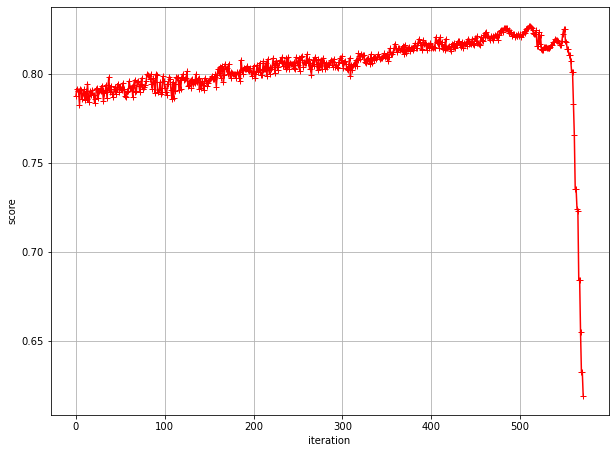

In [25]:
dt_model2 = []
score = []
for i in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha = i)
    dt_m.fit(x_train,y_train)
    dt_model2.append(dt_m)
    score.append(dt_m.score(x_test, y_test))

    
plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

In [26]:
train_score = [i.score(x_train,y_train) for i in dt_modle2]

In [27]:
test_score = [i.score(x_test ,y_test) for i in dt_modle2]

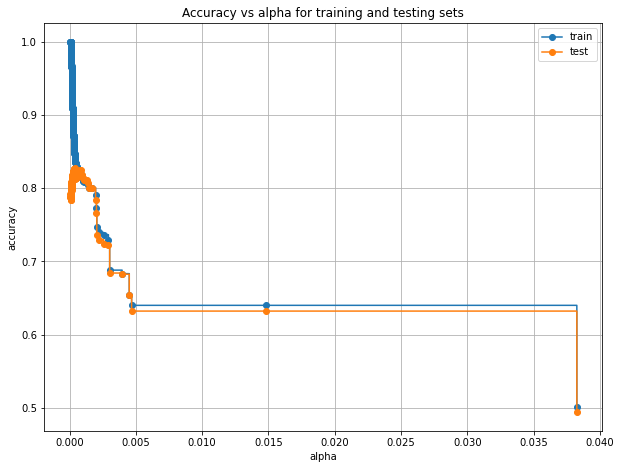

In [28]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [37]:
dt_model_ccp = DecisionTreeClassifier(random_state=0 , ccp_alpha=.001)
dt_model_ccp.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=0)

[Text(0.2375, 0.9761904761904762, 'X[0] <= 0.275\ngini = 0.5\nsamples = 7468\nvalue = [3723, 3745]'),
 Text(0.04, 0.9285714285714286, 'X[0] <= 0.197\ngini = 0.384\nsamples = 1836\nvalue = [1360, 476]'),
 Text(0.02, 0.8809523809523809, 'gini = 0.272\nsamples = 880\nvalue = [737, 143]'),
 Text(0.06, 0.8809523809523809, 'X[0] <= 0.215\ngini = 0.454\nsamples = 956\nvalue = [623, 333]'),
 Text(0.04, 0.8333333333333334, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(0.08, 0.8333333333333334, 'X[0] <= 0.216\ngini = 0.439\nsamples = 923\nvalue = [623, 300]'),
 Text(0.06, 0.7857142857142857, 'gini = 0.235\nsamples = 162\nvalue = [140, 22]'),
 Text(0.1, 0.7857142857142857, 'X[0] <= 0.235\ngini = 0.464\nsamples = 761\nvalue = [483, 278]'),
 Text(0.08, 0.7380952380952381, 'gini = 0.0\nsamples = 52\nvalue = [0, 52]'),
 Text(0.12, 0.7380952380952381, 'X[0] <= 0.236\ngini = 0.434\nsamples = 709\nvalue = [483, 226]'),
 Text(0.1, 0.6904761904761905, 'gini = 0.279\nsamples = 197\nvalue = [164, 33]'

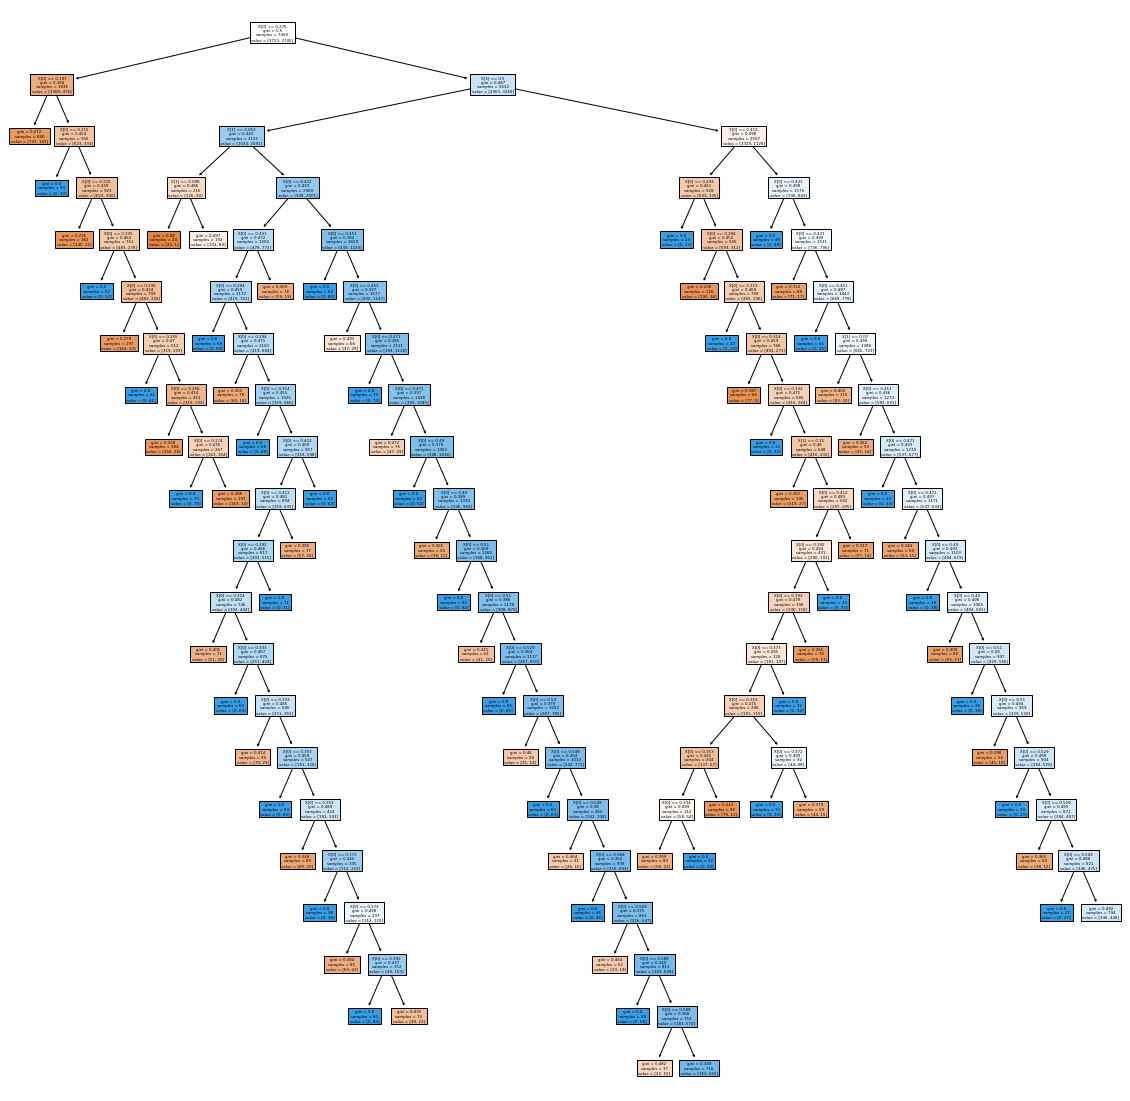

In [38]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

In [39]:
dt_model_ccp.score(x_train,y_train)

0.8097214783074451

In [40]:
dt_model_ccp.score(x_test,y_test)

0.8137044967880086

In [41]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [53]:
grid_pram = {"criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : [5,10,13,17],
             "min_samples_split":[2,3,4,5],
             "min_samples_leaf":[1,2,3],
             'ccp_alpha':np.random.rand(6)
             }

In [54]:
grid_ccp = GridSearchCV(estimator=dt_model_ccp,param_grid=grid_pram , cv = 5 , n_jobs=-1,verbose=1)
grid_ccp.fit(x_train,y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.001, random_state=0),
             n_jobs=-1,
             param_grid={'ccp_alpha': array([0.68327185, 0.52782038, 0.09035766, 0.33034116, 0.46383412,
       0.10020942]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 13, 17],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [55]:
grid_ccp.best_params_

{'ccp_alpha': 0.6832718466859146,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [55]:
dt_cpp_new = DecisionTreeClassifier(criterion='gini' , max_depth=5 ,min_samples_leaf=1 , min_samples_split=2 , splitter='best',ccp_alpha=0.001)
dt_cpp_new.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5)

In [60]:
dt_cpp_new.score(x_train,y_train)

0.68626138189609

In [61]:
dt_cpp_new.score(x_test,y_test)

0.6761241970021413

# knn

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier()

In [33]:
pram  = {
    'n_neighbors':[3,5,7,9,12,13,15,17,21],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [10 , 15 , 20 , 25 , 30 , 35 , 45 , 50 ],
    'p' : [1,2],
    'weights' : ['uniform', 'distance']
    
    
    
}

In [37]:
grid_serach_knn = GridSearchCV(param_grid= pram, cv = 5 , n_jobs=-1,verbose=1 ,estimator = knn)
grid_serach_knn.fit(x_train,y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 15, 20, 25, 30, 35, 45, 50],
                         'n_neighbors': [3, 5, 7, 9, 12, 13, 15, 17, 21],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=1)

In [39]:
grid_serach_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 3,
 'p': 1,
 'weights': 'distance'}

In [67]:
knn = KNeighborsClassifier(algorithm='auto',leaf_size=10,n_neighbors=3,p=1,weights='distance')
knn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=3, p=1, weights='distance')

In [68]:
predictions=knn.predict(x_train)
print(confusion_matrix(y_train,predictions))
print(accuracy_score(y_train,predictions))
print(classification_report(y_train,predictions))

[[3723    0]
 [   0 3745]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3723
           1       1.00      1.00      1.00      3745

    accuracy                           1.00      7468
   macro avg       1.00      1.00      1.00      7468
weighted avg       1.00      1.00      1.00      7468



In [69]:
prediction=knn.predict(x_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[645 300]
 [130 793]]
0.7698072805139187
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       945
           1       0.73      0.86      0.79       923

    accuracy                           0.77      1868
   macro avg       0.78      0.77      0.77      1868
weighted avg       0.78      0.77      0.77      1868



In [43]:
knnn=KNeighborsClassifier()

In [46]:
pram  = {
    'n_neighbors':[3,5,7,9,12,13,15],
    'metric' :['minkowski','euclidean','manhattan'],
    'weights' :['uniform', 'distance']
}

In [47]:
grid_serach_knn = GridSearchCV(param_grid= pram, cv = 3 , n_jobs=-1,verbose=1 ,estimator = knn)
grid_serach_knn.fit(x_train,y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


GridSearchCV(cv=3,
             estimator=KNeighborsClassifier(leaf_size=10, n_neighbors=3, p=1,
                                            weights='distance'),
             n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 12, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [48]:
grid_serach_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

In [55]:
knnn=KNeighborsClassifier(metric = 'euclidean', n_neighbors = 3, weights = 'distance',algorithm='auto',p=2)
knnn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [72]:
knnn.score(x_train,y_train)

1.0

In [57]:
knnn.score(x_test,y_test)

0.7682012847965739

# xgboost

In [50]:
import xgboost

In [51]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [52]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [53]:
classifier=xgboost.XGBClassifier()

In [54]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [55]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\ASUS-PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:50:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 10.52 seconds.


In [56]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [57]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.3,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [58]:
classifier=xgboost.XGBClassifier(min_child_weight = 3,max_depth = 15,learning_rate = 0.3,gamma = 0.0,colsample_bytree = 0.5)

In [59]:
classifier.fit(x_train,y_train)

[17:52:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [60]:
classifier.score(x_train,y_train)

0.9792447777182646

In [61]:
classifier.score(x_test,y_test)

0.8372591006423983

In [62]:
predictions=classifier.predict(x_train)
print(confusion_matrix(y_train,predictions))
print(accuracy_score(y_train,predictions))
print(classification_report(y_train,predictions))

[[3697   26]
 [ 129 3616]]
0.9792447777182646
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3723
           1       0.99      0.97      0.98      3745

    accuracy                           0.98      7468
   macro avg       0.98      0.98      0.98      7468
weighted avg       0.98      0.98      0.98      7468



In [63]:
prediction=classifier.predict(x_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[822 123]
 [181 742]]
0.8372591006423983
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       945
           1       0.86      0.80      0.83       923

    accuracy                           0.84      1868
   macro avg       0.84      0.84      0.84      1868
weighted avg       0.84      0.84      0.84      1868



# naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold

In [66]:
nb_classifier = GaussianNB()

In [66]:
cv_method = StratifiedKFold(n_splits=5)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [67]:
grid_search = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='f1') 
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.3366...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1', verbose=1)

In [68]:
grid_search.best_params_

{'var_smoothing': 0.0005336699231206307}

In [73]:
nb_classifier = GaussianNB(var_smoothing = 1e-09)

In [79]:
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [58]:
nb_predictions=nb_classifier.predict(x_train)
print(confusion_matrix(y_train,nb_predictions))
print(accuracy_score(y_train,nb_predictions))
print(classification_report(y_train,nb_predictions))

[[2083  986]
 [1539 1472]]
0.584703947368421
              precision    recall  f1-score   support

           0       0.58      0.68      0.62      3069
           1       0.60      0.49      0.54      3011

    accuracy                           0.58      6080
   macro avg       0.59      0.58      0.58      6080
weighted avg       0.59      0.58      0.58      6080



In [59]:
nb_prediction=nb_classifier.predict(x_test)
print(confusion_matrix(y_test,nb_prediction))
print(accuracy_score(y_test,nb_prediction))
print(classification_report(y_test,nb_prediction))

[[487 244]
 [409 380]]
0.5703947368421053
              precision    recall  f1-score   support

           0       0.54      0.67      0.60       731
           1       0.61      0.48      0.54       789

    accuracy                           0.57      1520
   macro avg       0.58      0.57      0.57      1520
weighted avg       0.58      0.57      0.57      1520



# prediction for new customer

In [83]:
new_customer_=pd.read_csv(r'C:\Users\ASUS-PC\Downloads\test_lTY72QC.csv')

In [84]:
new_customer_.drop(['ID'],axis=1,inplace=True)

In [85]:
new_customer=pd.get_dummies(new_customer_)
new_customer.head()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Gender_Female,Gender_Male,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
0,50,1008636.39,2,1,1,1,0,0,0,0,1,0,1,0,1,0,0
1,36,341460.72,2,0,1,0,1,0,1,0,0,0,1,0,1,0,0
2,25,439460.10,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0
3,41,28581.93,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1
4,48,1104540.03,2,1,0,0,1,0,0,0,1,0,0,1,0,1,0


In [86]:
col_names = ['Age','Balance']
features = new_customer[col_names]
scaler =  MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
new_customer[col_names] = features
new_customer.head()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Gender_Female,Gender_Male,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
0,0.568627,0.413891,2,1,1,1,0,0,0,0,1,0,1,0,1,0,0
1,0.294118,0.139709,2,0,1,0,1,0,1,0,0,0,1,0,1,0,0
2,0.078431,0.179983,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0
3,0.392157,0.011128,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1
4,0.529412,0.453303,2,1,0,0,1,0,0,0,1,0,0,1,0,1,0


In [87]:
new_customer['Is_churn']=rf_new.predict(new_customer)

In [88]:
new_customer.head()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Gender_Female,Gender_Male,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor,Is_churn
0,0.568627,0.413891,2,1,1,1,0,0,0,0,1,0,1,0,1,0,0,1
1,0.294118,0.139709,2,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1
2,0.078431,0.179983,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0
3,0.392157,0.011128,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0
4,0.529412,0.453303,2,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0


In [89]:
new_customer.Is_churn.value_counts()

0    1747
1    1104
Name: Is_churn, dtype: int64